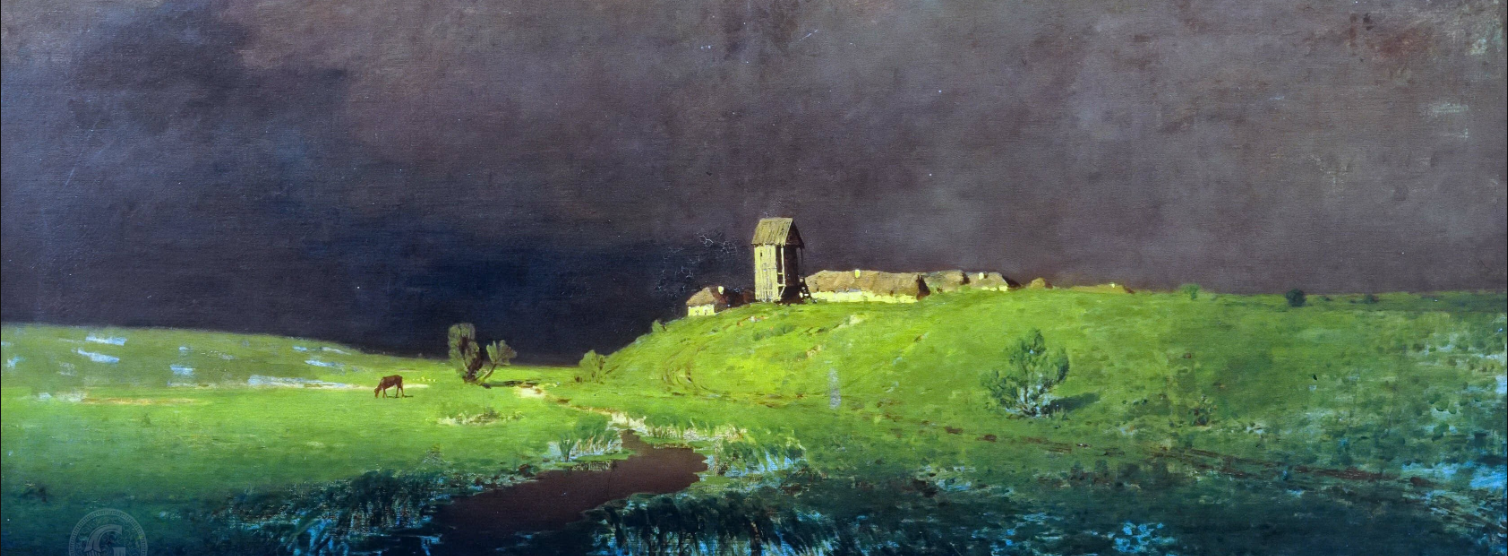

# Задание:🎯
В практичесской работе требуется выполнить следующее:
- обучить модель AlexNet на наборе данных CIFAR100 и сохранить процесса результаты обучения (accuracy, loss);
- обучить модель ResNet (используя готовую модель, но не предобученную(pretrained=False)) на наборе данных CIFAR100 и сохранить процесса результаты обучения;
- обучить модель ResNet (используя готовую модель, предобученную(pretrained=True) и зафиксировав веса модели, кроме весов выходного полносвязного слоя(fc) ) на наборе данных CIFAR100 и сохранить процесса результаты обучения;
- обучить модель ResNet (используя готовую модель, предобученную(pretrained=True) и зафиксировав веса модели, кроме весов выходного полносвязного слоя(fc) и доавить в модель еще один полносвязный слой и dropout) на наборе данных CIFAR100 и сохранить процесса результаты обучения;
- обучить модель ResNet (используя готовую модель, предобученную(pretrained=True), не фиксируя исходные веса модели) на наборе данных CIFAR100 и сохранить процесса результаты обучения.
Сформировать отчет.





In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision import models
import numpy as np

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_epochs = 20 # коичество проходов по набору данных во время обучения
learning_rate = 0.001 # скорость изменения весов модели

transform_train = transforms.Compose([ # преобразования
    transforms.RandomHorizontalFlip(p=0.5), # зеркалит изображение с вероятностью 0.5
    transforms.ToTensor(), # преобразует изображение в тензор
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), # нормализация пикселей
    ])
transform_test = transforms.Compose([
   # transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
   # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

train_dataset = torchvision.datasets.CIFAR100(root='../../data/', # загружаем набор данных для обучения модели
                                             train=True,
                                             transform=transform_train,
                                             download=True)

test_dataset = torchvision.datasets.CIFAR100(root='../../data/', # загружаем набор данных для тестирования модели
                                            train=False,
                                            transform=transform_test)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, # подача данных в модель по 100 штук, перемешивает перед подачей
                                           batch_size=100,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=100,
                                          shuffle=False)

Files already downloaded and verified


In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms as T

In [ ]:
plt.figure(figsize=(20,2))


<Figure size 2000x200 with 0 Axes>

<Figure size 2000x200 with 0 Axes>

AlexNet (2012)

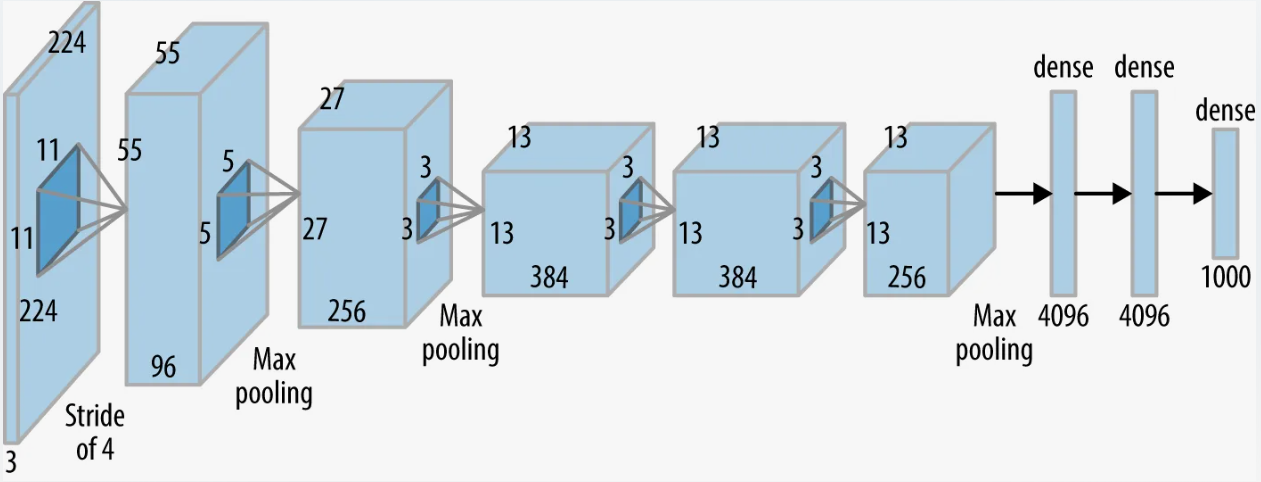

In [ ]:
class AlexNet(torch.nn.Module):
    def __init__(self, num_classes=100):
        super(AlexNet, self).__init__()
        self.features = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=3, out_channels=96 , kernel_size=3, stride=1,  padding=1), #32x32
            torch.nn.BatchNorm2d(96),# num_features
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2),#16x16

            torch.nn.Conv2d(in_channels=96, out_channels=96 , kernel_size=3, stride=1,  padding=1), # 16x16
            torch.nn.BatchNorm2d(96),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2),#8x8

            torch.nn.Conv2d(in_channels=96, out_channels=96 , kernel_size=3, stride=1,  padding=0), #6x6
            torch.nn.BatchNorm2d(96),
            torch.nn.ReLU(inplace=True),

            torch.nn.Conv2d(in_channels=96, out_channels=96 , kernel_size=3, stride=1,  padding=0), #4x4
            torch.nn.BatchNorm2d(96),
            torch.nn.ReLU(inplace=True),

            # torch.nn.Conv2d(in_channels=384, out_channels=256 , kernel_size=3, stride=1,  padding=0), #4x4
            # torch.nn.BatchNorm2d(256),
            # torch.nn.ReLU(inplace=True),

            torch.nn.MaxPool2d(kernel_size=2),#2x2
        )
        self.classifier = torch.nn.Sequential(
            torch.nn.Dropout(),
            torch.nn.Linear(96 * 2 * 2, 4096),
            torch.nn.ReLU(inplace=True),
            torch.nn.Dropout(),
            torch.nn.Linear(4096, 4096),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 96 * 2 * 2)
        x = self.classifier(x)
        return x

# Вариант 0 - AlexNet без предобучения
model = AlexNet()
model.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1))
    (9): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1))
    (12): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace=True)
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, di

ResNet (Microsoft) 2016

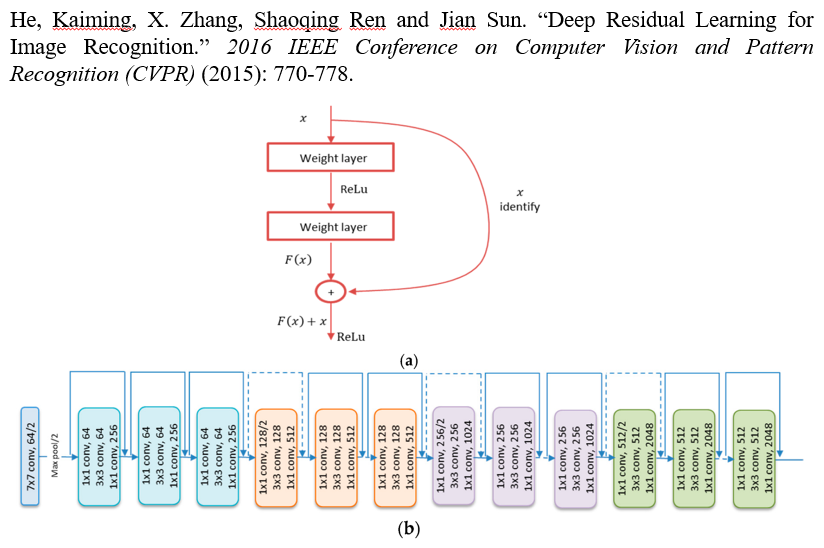

In [ ]:
# Вариант 1 - ResNet без предобучения
from torchvision.models import resnet18
model = models.resnet18(pretrained=False)
model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# Вариант 2 - ResNet  предобученная
model = models.resnet18(pretrained=True)
model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 169MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# Вариант 3 - ResNet предобученная с фиксацией весов

model = models.resnet18(pretrained=True)

# Disable grad for all conv layers
for param in model.parameters():
    param.requires_grad = False


some_more_layers = nn.Sequential(torch.nn.Linear(model.fc.in_features, model.fc.in_features),
                                  torch.nn.Dropout(),
                                  torch.nn.Linear(model.fc.in_features, 100))
model.fc = some_more_layers

in_features = model.fc[-1].in_features

model.fc = torch.nn.Linear(in_features, 100)

model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
test_loss_history=[]
test_accuracy_history=[]

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# For updating learning rate
def update_lr(optimizer, lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

# Train the model
total_step = len(train_loader)
curr_lr = learning_rate
for epoch in range(num_epochs):
    model.train()
    for i, (images, labels) in enumerate(train_loader):

        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ("Epoch [{}/{}], Step [{}/{}] Loss: {:.4f}"
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Decay learning rate
    if (epoch+1) % 5 == 0:
        curr_lr /= 3
        update_lr(optimizer, curr_lr)

# Test the model
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        test_loss=0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images).to(device)
            test_loss+=criterion(outputs, labels).data.cpu()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))
        test_loss_history.append((test_loss/(total/test_loader.batch_size)).data.cpu())
        test_accuracy_history.append((correct/total))
# Save the model checkpoint
torch.save(model.state_dict(), 'resnet.ckpt')

Epoch [1/20], Step [100/500] Loss: 3.8941
Epoch [1/20], Step [200/500] Loss: 3.3876
Epoch [1/20], Step [300/500] Loss: 3.2700
Epoch [1/20], Step [400/500] Loss: 3.4416
Epoch [1/20], Step [500/500] Loss: 3.0613
Accuracy of the model on the test images: 23.71 %
Epoch [2/20], Step [100/500] Loss: 3.2459
Epoch [2/20], Step [200/500] Loss: 3.1008
Epoch [2/20], Step [300/500] Loss: 3.4005
Epoch [2/20], Step [400/500] Loss: 2.8137
Epoch [2/20], Step [500/500] Loss: 2.9070
Accuracy of the model on the test images: 25.77 %
Epoch [3/20], Step [100/500] Loss: 3.1205
Epoch [3/20], Step [200/500] Loss: 3.2282
Epoch [3/20], Step [300/500] Loss: 3.0228
Epoch [3/20], Step [400/500] Loss: 2.9586
Epoch [3/20], Step [500/500] Loss: 3.2798
Accuracy of the model on the test images: 26.41 %
Epoch [4/20], Step [100/500] Loss: 3.0033
Epoch [4/20], Step [200/500] Loss: 3.1038
Epoch [4/20], Step [300/500] Loss: 3.1286
Epoch [4/20], Step [400/500] Loss: 2.8561
Epoch [4/20], Step [500/500] Loss: 2.8218
Accuracy o

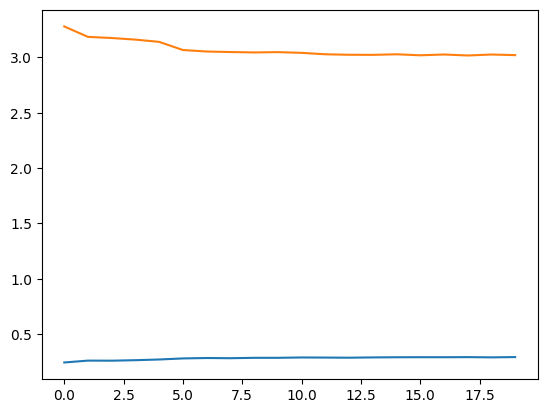

In [ ]:
plt.plot(test_accuracy_history)
plt.plot(test_loss_history)

willow_tree
willow_tree


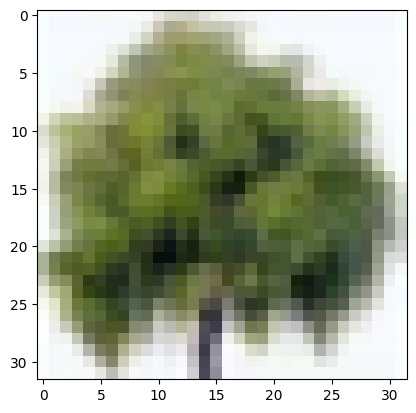

In [ ]:
X, y = next(iter(train_loader))
output = model(X.to(device))
_, predicted = torch.max(output.data, 1)
print(train_dataset.classes[predicted[0]])
print(train_dataset.classes[y[0]])
plt.imshow(X[0].permute(1, 2, 0).numpy())
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
plt.imshow(X[0].permute(1, 2, 0).numpy() * std + mean)